In [2]:
# import the libraries and models
import os
import numpy as np
from skimage import io
#import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm, tqdm_notebook
from time import sleep
from time import time
from utils.dirs import listdir_nohidden
from utils.factory import create
from utils.logger import Logger
from utils.dirs import create_dirs
from models import *
from trainers import *
import tensorflow as tf
init = tf.global_variables_initializer()
from utils.config import process_config
#import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
#from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from sklearn import manifold
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, precision_recall_curve
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd

inference_dir = "graph_csv"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
#sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 20})

In [29]:
def create_visualizer_plot(plot_csv_list,legend_list,file_name="figure",save=False,type="AUROC"):
    # Create the plot figure
    plt.figure(1,figsize=(12,10));
    # Addition of data
    legend_handles = []
    for table,label in zip(plot_csv_list, legend_list):
        data = pd.read_csv(table)
        data_x, data_y = data.Step, data.Value
        leg_hand, = plt.plot(data_x, data_y, label=label)
        legend_handles.append(leg_hand)
    #Labels
    if type == "AUROC":
        plt.ylabel('True Positive Rate')
        plt.xlabel("False Positive Rate")
        plt.xlim(0.0,1.0)
        plt.ylim(0.0,1.0)
        plt.legend(legend_handles, legend_list)
    elif type == "train":
        plt.ylabel('Loss Value',fontsize=15)
        plt.xlabel("Training Step",fontsize=15)
        plt.legend(legend_handles, legend_list)
    plt.grid(True)
    plt.show()
    if save:
        plt.figsave(file_name)

In [25]:
anogan_csv_disc_fake = listdir_nohidden(inference_dir + "/anogan/disc_fake")
anogan_csv_disc_real = listdir_nohidden(inference_dir + "/anogan/disc_real")
anogan_csv_gen = listdir_nohidden(inference_dir + "/anogan/gen")

In [26]:
anogan_csv_disc_fake = [inference_dir + "/anogan/disc_fake/" + x for x in anogan_csv_disc_fake]
anogan_csv_disc_real = [inference_dir + "/anogan/disc_real/" + x for x in anogan_csv_disc_real]
anogan_csv_gen = [inference_dir + "/anogan/gen/" + x for x in anogan_csv_gen]

In [27]:
plot_csv_f = anogan_csv_disc_fake
plot_csv_r = anogan_csv_disc_real
plot_csv_g = anogan_csv_gen
legend_list = [
#     "ALAD",
#     "AnoGAN",
#     "BiGAN"
     "Norm",
     "IN",
     "SL",
     "LF",
     "IN + SL",
#     "LF + IN",
#     "SL + LF",
#     "IN + SL + LF"
]


/Users/yigitozgumus/anaconda3/envs/school/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


AttributeError: module 'matplotlib.pyplot' has no attribute 'figsave'

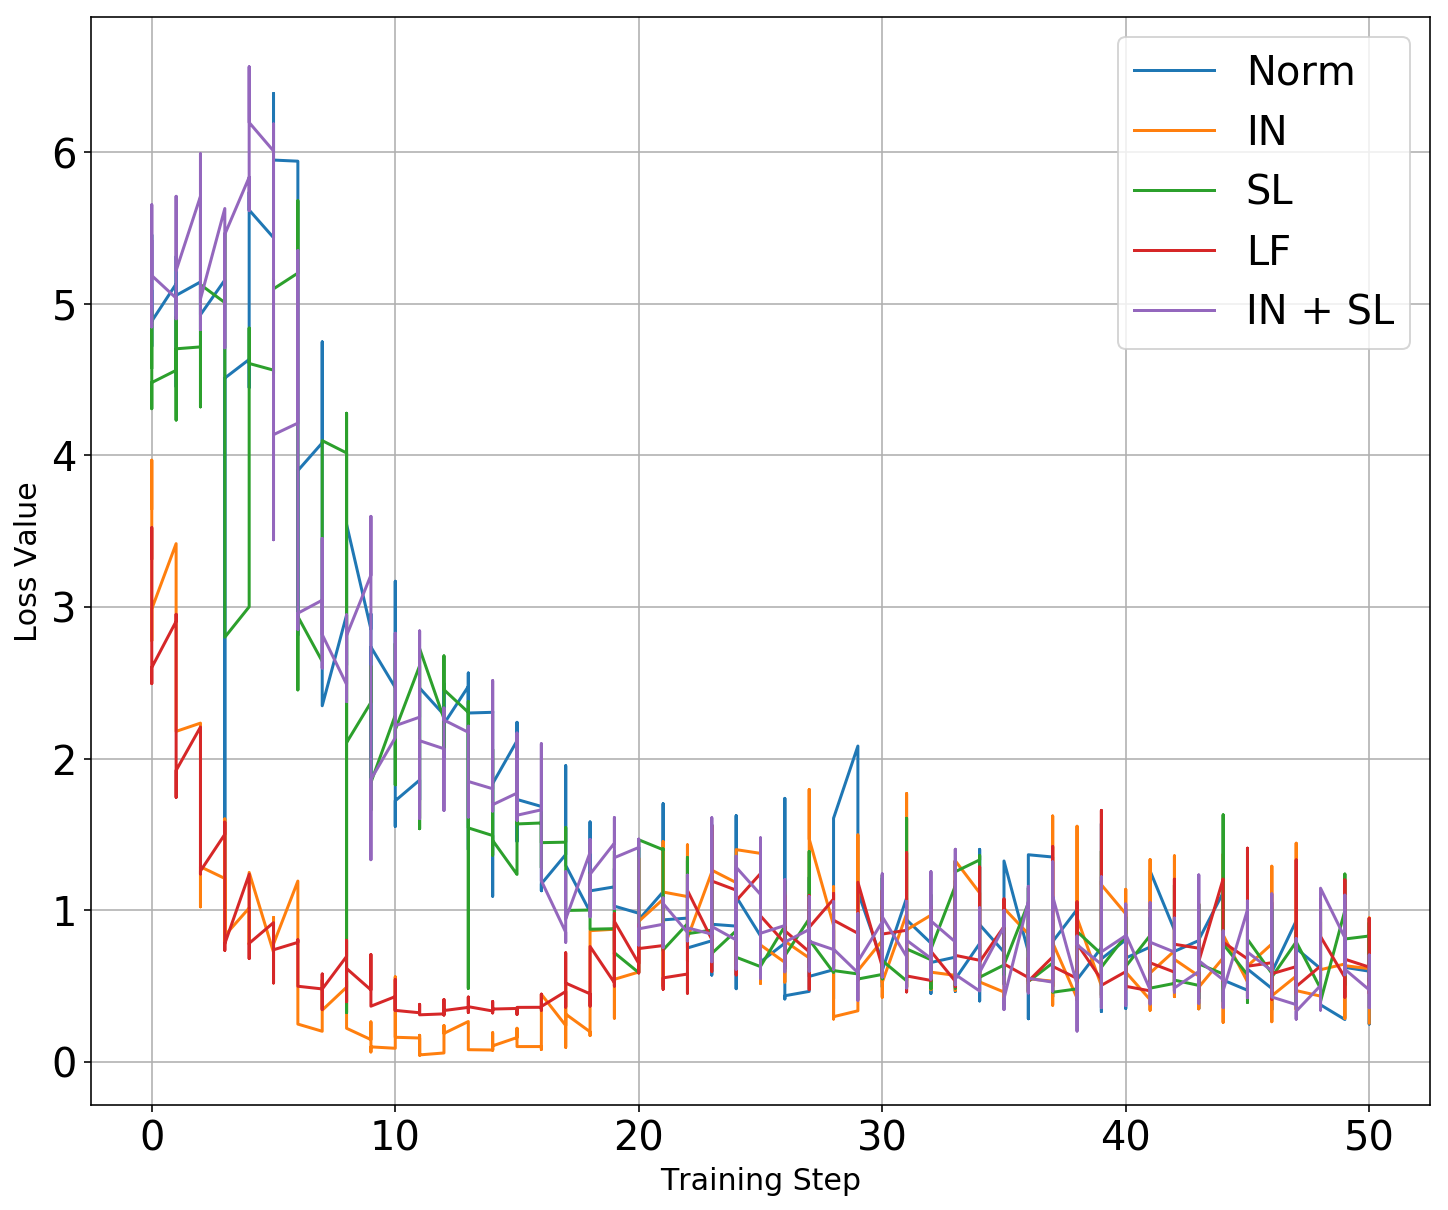

In [30]:
create_visualizer_plot(plot_csv_f, legend_list,type="train",file_name="saved/anogan_disc_fake.png",save=True)

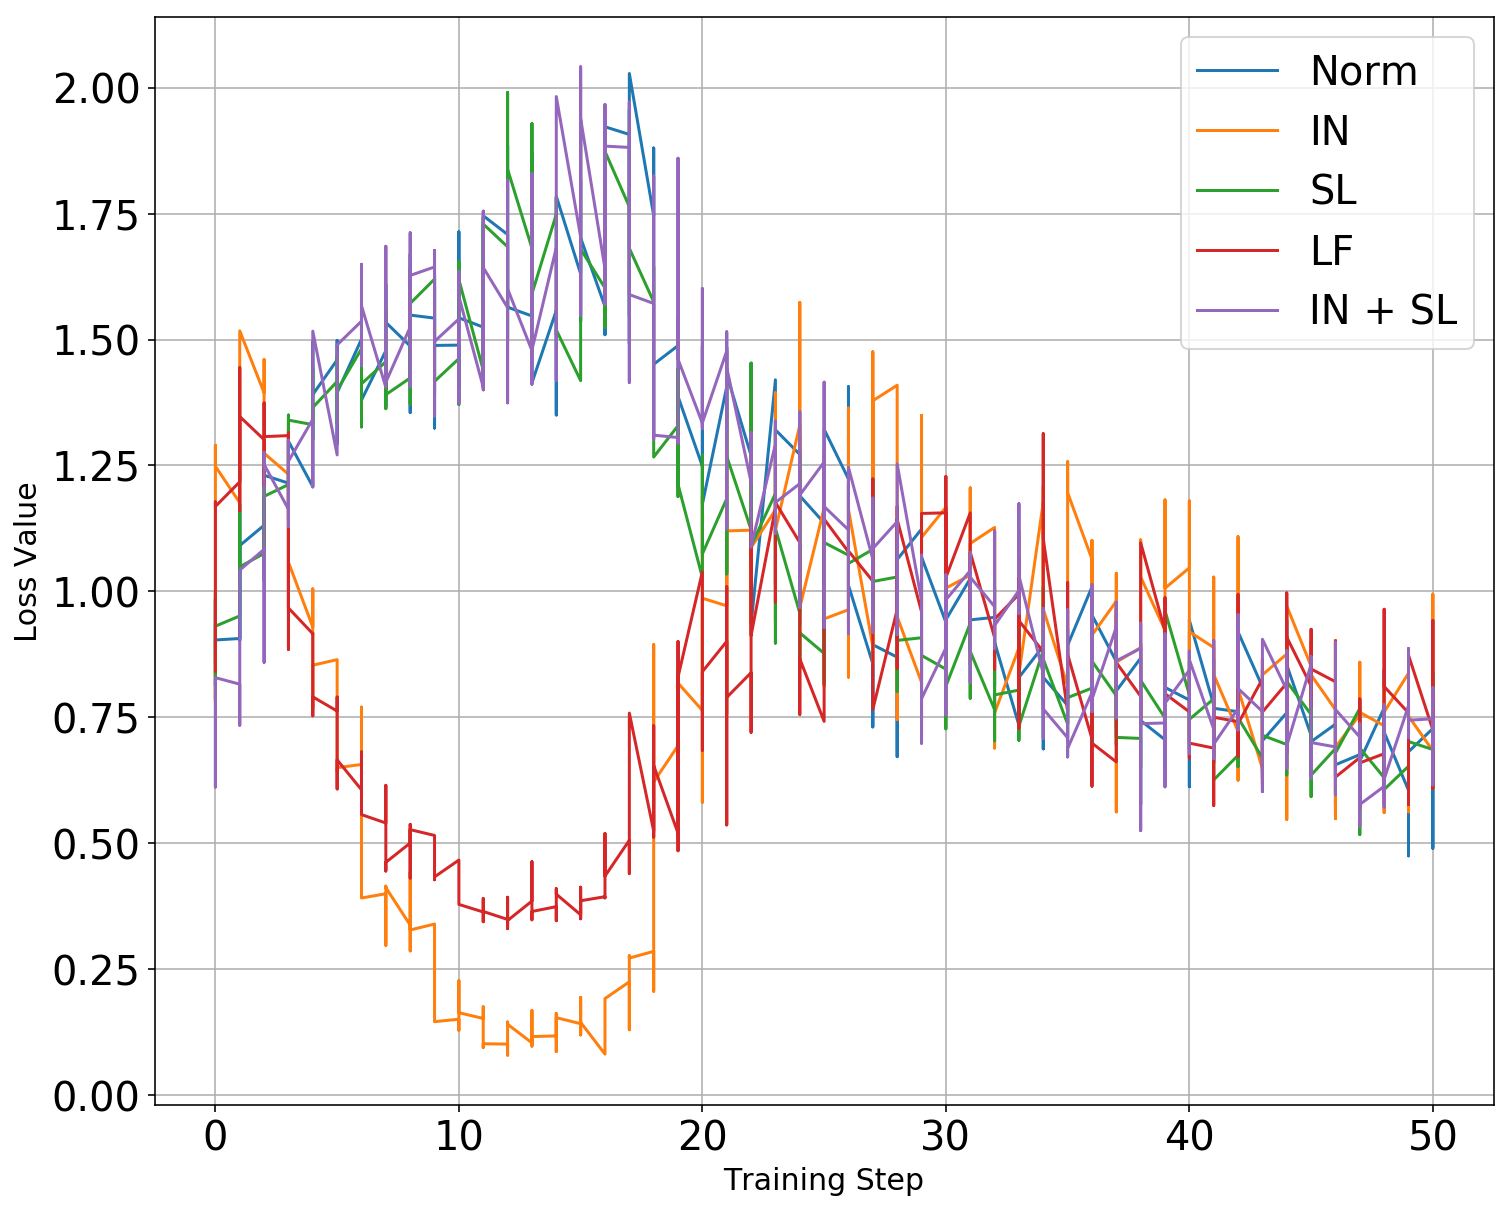

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsave'

In [35]:
create_visualizer_plot(plot_csv_r, legend_list,type="train",file_name="saved/anogan_disc_real.png",save=True)

In [1]:
create_visualizer_plot(plot_csv_g, legend_list,type="train",file_name="saved/anogan_gen.png",save=True)

NameError: name 'create_visualizer_plot' is not defined